In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
tf.__version__

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv
/kaggle/input/equity-post-HCT-survival-predictions/data_dictionary.csv
/kaggle/input/equity-post-HCT-survival-predictions/train.csv
/kaggle/input/equity-post-HCT-survival-predictions/test.csv


In [2]:
path_to_train_data = "/kaggle/input/equity-post-HCT-survival-predictions/train.csv"
path_to_test_data  = "/kaggle/input/equity-post-HCT-survival-predictions/test.csv"
path_to_catalog = "/kaggle/input/equity-post-HCT-survival-predictions/data_dictionary.csv"
path_to_submission = "/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv"

In [3]:
import random

# Set the random seed for reproducibility
SEED = 41
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

In [4]:
# path_to_file = "E:/Kaggle/equity-post-HCT-survival-predictions/"
# df_train = pd.read_csv(path_to_file+"train.csv")
# df_test = pd.read_csv(path_to_file+"test.csv")
# catalog = pd.read_csv(path_to_file+"data_dictionary.csv")


In [5]:
df_train = pd.read_csv(path_to_train_data)
df_test = pd.read_csv(path_to_test_data)
catalog = pd.read_csv(path_to_catalog)

In [6]:
df_train

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,28795,Intermediate - TED AML case <missing cytogenetics,NaN,Favorable,No,2.0,8.0,No TBI,No,6.0,...,Bi-directional non-permissive,NaN,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,18.633
28796,28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,...,GvH non-permissive,Related,"N/A, Mel not given",6.0,Yes,1.0,Yes,8.0,1.0,4.892
28797,28797,TBD cytogenetics,NaN,Poor,NaN,2.0,8.0,No TBI,NaN,6.0,...,GvH non-permissive,Unrelated,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,23.157
28798,28798,N/A - non-malignant indication,No,Poor,No,1.0,4.0,No TBI,No,3.0,...,Permissive mismatched,Related,MEL,4.0,No,1.0,No,5.0,0.0,52.351


In [7]:
catalog

,variable,description,type,values
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant in...
1,psych_disturb,Psychiatric disturbance,Categorical,['Yes' 'No' nan 'Not done']
2,cyto_score,Cytogenetic score,Categorical,['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
3,diabetes,Diabetes,Categorical,['No' 'Yes' nan 'Not done']
4,hla_match_c_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
5,hla_high_res_8,Recipient / 1st donor allele-level (high resol...,Numerical,NaN
6,tbi_status,TBI,Categorical,"['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <..."
7,arrhythmia,Arrhythmia,Categorical,['No' nan 'Yes' 'Not done']
8,hla_low_res_6,Recipient / 1st donor antigen-level (low resol...,Numerical,NaN
9,graft_type,Graft type,Categorical,['Peripheral blood' 'Bone marrow']


In [8]:
print("Shape of the training data: ",df_train.shape)
print("Columns of training data: ",df_train.columns)

Shape of the training data:  (28800, 60)
Columns of training data:  Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
   

In [9]:
print("Shape of the test data: ",df_test.shape)
print("Columns of test data: ",df_test.columns)

Shape of the test data:  (3, 58)
Columns of test data:  Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphal

In [10]:
count_nan = df_train.isnull().sum().sum()
print('Number of NaN values present: ' + str(count_nan))
df_train.isnull().sum()

Number of NaN values present: 189575


ID                            0
dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high           4620
hla_high_res_8             5829
tbi_status                    0
arrhythmia                 2202
hla_low_res_6              3270
graft_type                    0
vent_hist                   259
renal_issue                1915
pulm_severe                2135
prim_disease_hct              0
hla_high_res_6             5284
cmv_status                  634
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_c_low            2800
rituximab                  2148
hla_match_drb1_low         2643
hla_match_dqb1_low         4194
prod_type                     0
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
year_hct                      0
obesity                    1760
mrd_hct 

# Covriance matrix plots for feature extraction

shape before NaN removal:  (28800, 52)
shape after NaN removal:  (28800, 52)
(22, 22)


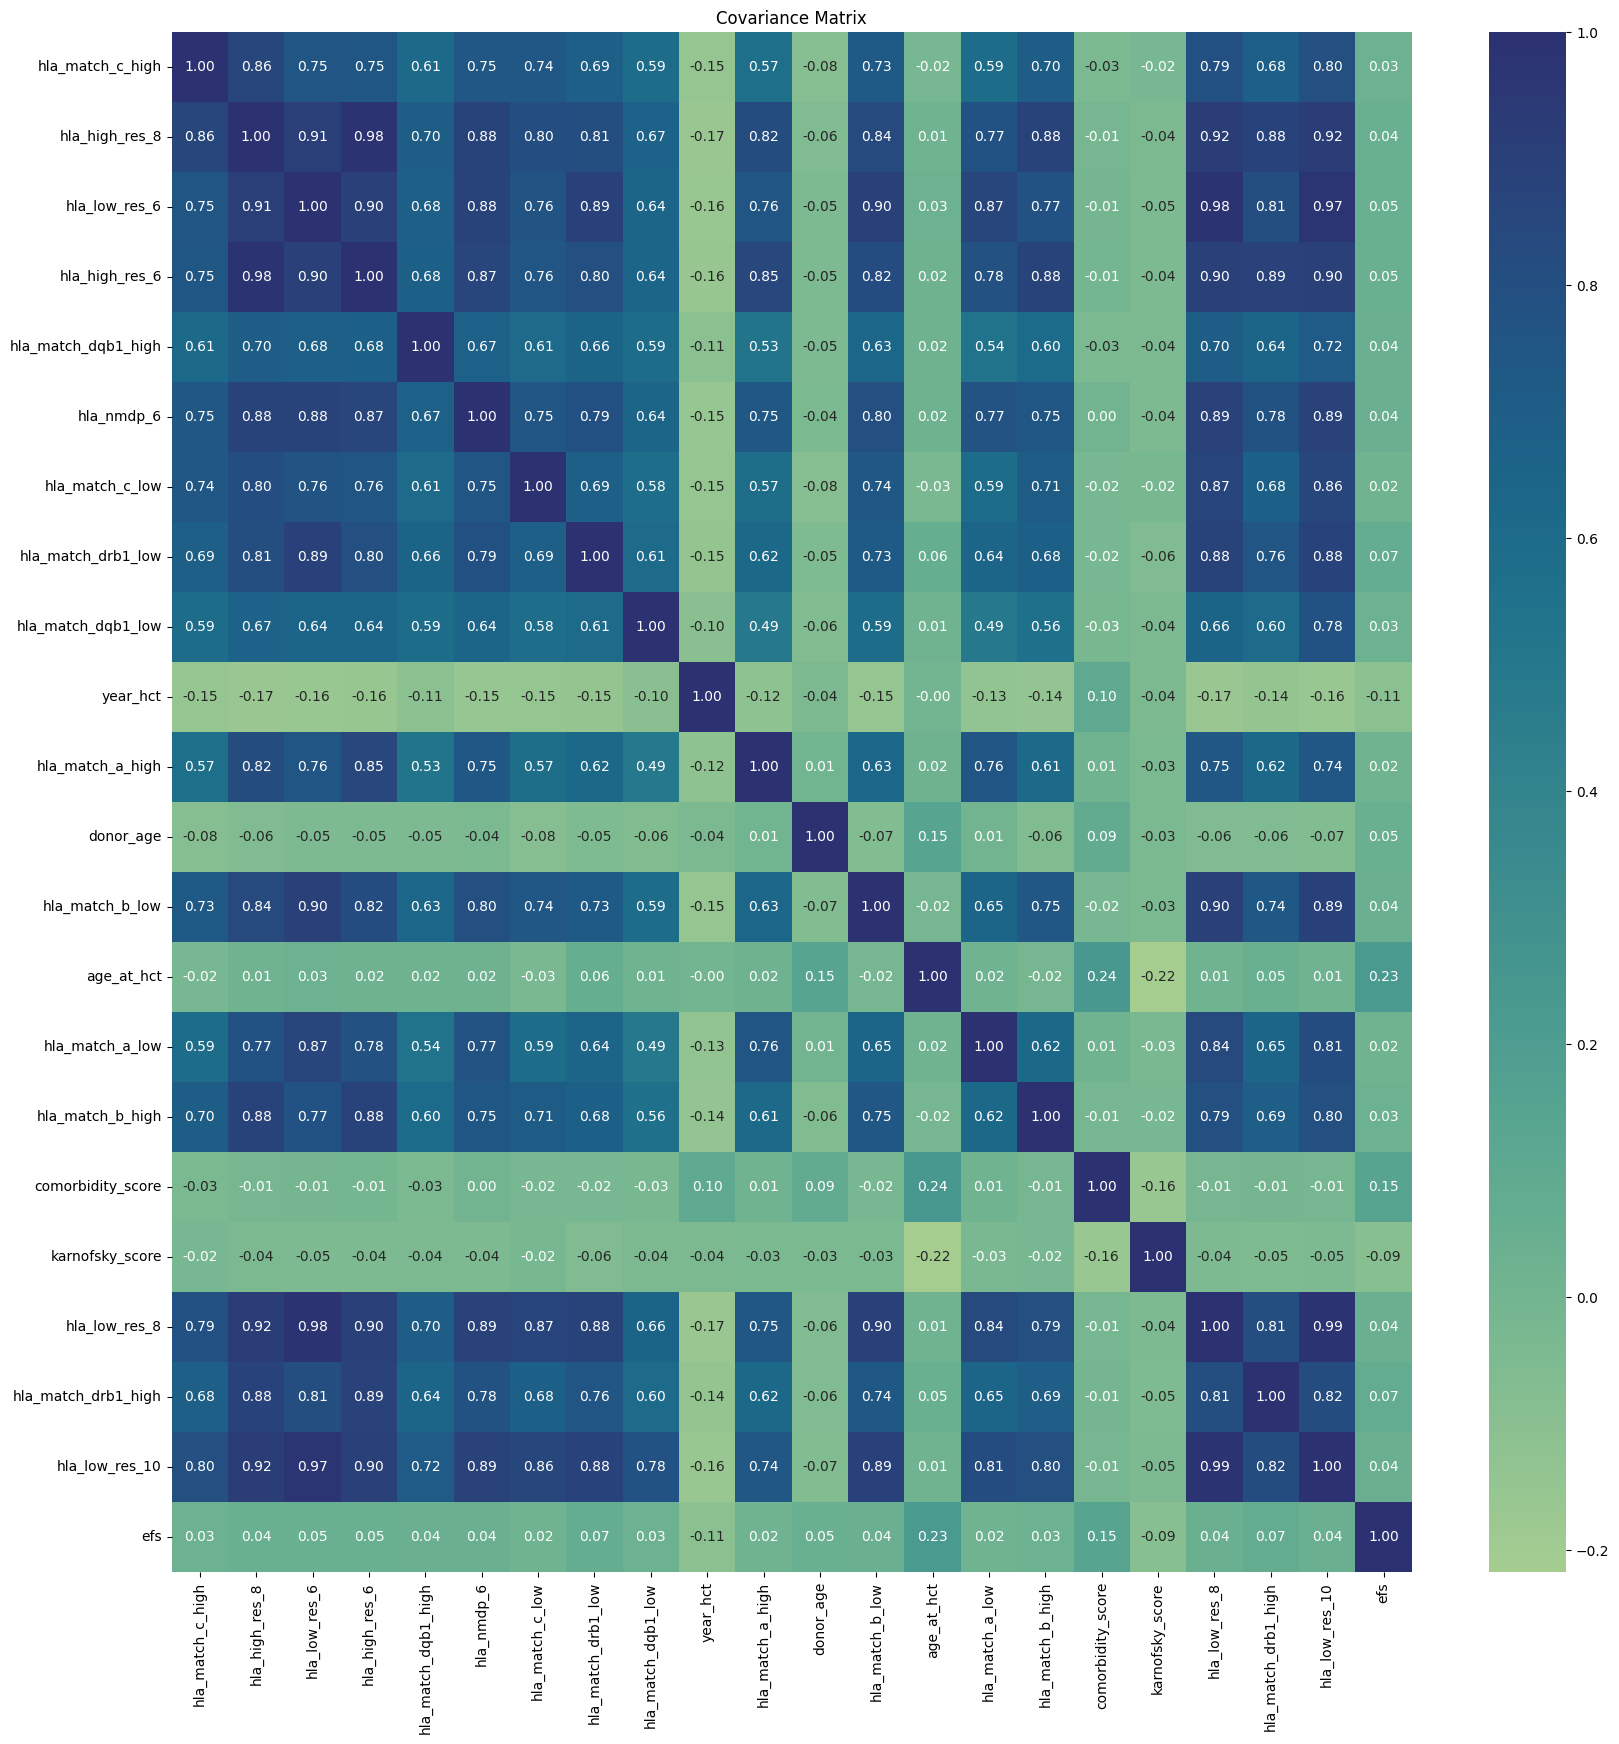

In [11]:
# covariance matrix plot with NAN values included
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import file with data
cols_to_drop = ["efs_time","ID","tce_div_match","tce_match","mrd_hct","cyto_score_detail","hla_high_res_10","cyto_score"]
y_train = df_train["efs"]
df_plot = df_train.drop(cols_to_drop,axis=1)

print("shape before NaN removal: ",df_plot.shape)
#df_plot = df_plot.dropna(how = 'any')
print("shape after NaN removal: ",df_plot.shape)
# Calculate the covariance matrix
data = df_plot.corr(numeric_only=True)
print(data.shape)
# Plot the covariance matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data, annot=True, fmt=".2f", cbar=True,cmap="crest")
plt.title('Covariance Matrix')
plt.show()

In [12]:
print("Correlation between Columns")
data

Correlation between Columns


,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,year_hct,...,hla_match_b_low,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs
hla_match_c_high,1.000000,0.858282,0.754627,0.750739,0.613023,0.747162,0.742873,0.687148,0.593530,-0.150124,...,0.728296,-0.021295,0.588746,0.702993,-0.034718,-0.022375,0.789160,0.681908,0.798376,0.031850
hla_high_res_8,0.858282,1.000000,0.909537,0.983351,0.699397,0.883250,0.800855,0.813857,0.665181,-0.165231,...,0.842374,0.011972,0.773468,0.883800,-0.014173,-0.038712,0.922293,0.879812,0.922255,0.044224
hla_low_res_6,0.754627,0.909537,1.000000,0.899229,0.684575,0.882176,0.763247,0.893837,0.639613,-0.162176,...,0.897411,0.025693,0.867108,0.772630,-0.008468,-0.046744,0.983812,0.806428,0.968904,0.047007
hla_high_res_6,0.750739,0.983351,0.899229,1.000000,0.679518,0.870521,0.759922,0.798041,0.639689,-0.157125,...,0.819254,0.022085,0.782468,0.884266,-0.006176,-0.042139,0.903878,0.886769,0.902408,0.045261
hla_match_dqb1_high,0.613023,0.699397,0.684575,0.679518,1.000000,0.669252,0.608257,0.656886,0.590400,-0.105586,...,0.627079,0.023520,0.538623,0.599843,-0.034074,-0.038852,0.697815,0.640079,0.719347,0.039736
hla_nmdp_6,0.747162,0.883250,0.882176,0.870521,0.669252,1.000000,0.754331,0.787465,0.639206,-0.152893,...,0.798461,0.021023,0.770199,0.752435,0.002780,-0.043804,0.889669,0.779776,0.890334,0.040145
hla_match_c_low,0.742873,0.800855,0.763247,0.759922,0.608257,0.754331,1.000000,0.685870,0.578571,-0.150785,...,0.739596,-0.029774,0.590389,0.707312,-0.021406,-0.024026,0.866675,0.678618,0.860796,0.016335
hla_match_drb1_low,0.687148,0.813857,0.893837,0.798041,0.656886,0.787465,0.685870,1.000000,0.607881,-0.145098,...,0.728705,0.060414,0.642660,0.680334,-0.018370,-0.058727,0.882783,0.757817,0.880678,0.067485
hla_match_dqb1_low,0.593530,0.665181,0.639613,0.639689,0.590400,0.639206,0.578571,0.607881,1.000000,-0.102319,...,0.592188,0.011524,0.493960,0.559903,-0.027194,-0.039820,0.657325,0.603762,0.775921,0.032440
year_hct,-0.150124,-0.165231,-0.162176,-0.157125,-0.105586,-0.152893,-0.150785,-0.145098,-0.102319,1.000000,...,-0.150728,-0.000174,-0.131944,-0.139322,0.097709,-0.037338,-0.168712,-0.144395,-0.162188,-0.106419


In [13]:
# covariance matrix with NAN values removed
cols_to_drop = ["efs_time","ID"]
y_train = df_train["efs"]
df_plot = df_train.drop(cols_to_drop,axis=1)
print("shape before NaN removal: ",df_plot.shape)
df_plot = df_plot.dropna(how = 'any')
print("shape after NaN removal: ",df_plot.shape)
# Calculate the covariance matrix
df_plot.corr(numeric_only=True)

shape before NaN removal:  (28800, 58)
shape after NaN removal:  (1974, 58)


,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,...,hla_match_b_low,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs
hla_match_c_high,1.000000,0.726652,0.563063,0.579892,0.710091,0.387139,0.538772,0.618718,0.534809,0.417827,...,0.577527,0.030334,0.307645,0.571223,0.022860,-0.016606,0.625438,0.552394,0.639146,0.016733
hla_high_res_8,0.726652,1.000000,0.842368,0.981079,0.973664,0.519488,0.807959,0.659010,0.682570,0.501788,...,0.742470,0.084700,0.633283,0.818538,0.033081,-0.047115,0.865674,0.814286,0.865559,0.032949
hla_low_res_6,0.563063,0.842368,1.000000,0.840251,0.842149,0.519923,0.802694,0.590468,0.795321,0.463944,...,0.813348,0.092634,0.814376,0.654420,0.021227,-0.037042,0.977287,0.703751,0.951581,0.024939
hla_high_res_6,0.579892,0.981079,0.840251,1.000000,0.954515,0.506939,0.806292,0.607130,0.658716,0.477301,...,0.717710,0.091894,0.664287,0.809693,0.032787,-0.051191,0.850310,0.809957,0.846311,0.034357
hla_high_res_10,0.710091,0.973664,0.842149,0.954515,1.000000,0.700617,0.796808,0.654045,0.705397,0.531677,...,0.754263,0.092459,0.608350,0.798383,0.020365,-0.042528,0.864190,0.816405,0.871744,0.037180
hla_match_dqb1_high,0.387139,0.519488,0.519923,0.506939,0.700617,1.000000,0.457681,0.388787,0.507511,0.422223,...,0.503188,0.081442,0.298044,0.430472,-0.027207,-0.011935,0.529591,0.511328,0.558265,0.036227
hla_nmdp_6,0.538772,0.807959,0.802694,0.806292,0.796808,0.457681,1.000000,0.578450,0.651298,0.434196,...,0.625244,0.073432,0.666289,0.602121,0.038921,-0.043253,0.811898,0.667533,0.802706,-0.000357
hla_match_c_low,0.618718,0.659010,0.590468,0.607130,0.654045,0.388787,0.578450,1.000000,0.573101,0.388370,...,0.599949,0.024871,0.318727,0.581516,0.049849,-0.057207,0.748090,0.574750,0.736701,-0.013181
hla_match_drb1_low,0.534809,0.682570,0.795321,0.658716,0.705397,0.507511,0.651298,0.573101,1.000000,0.450276,...,0.616302,0.057204,0.423252,0.531961,-0.005456,-0.016842,0.804431,0.663368,0.800330,-0.016210
hla_match_dqb1_low,0.417827,0.501788,0.463944,0.477301,0.531677,0.422223,0.434196,0.388370,0.450276,1.000000,...,0.458941,0.027607,0.260047,0.424297,-0.060286,-0.052447,0.483452,0.485221,0.662915,-0.010183


shape before NaN removal:  (28800, 58)
shape after NaN removal:  (1974, 58)
(23, 23)


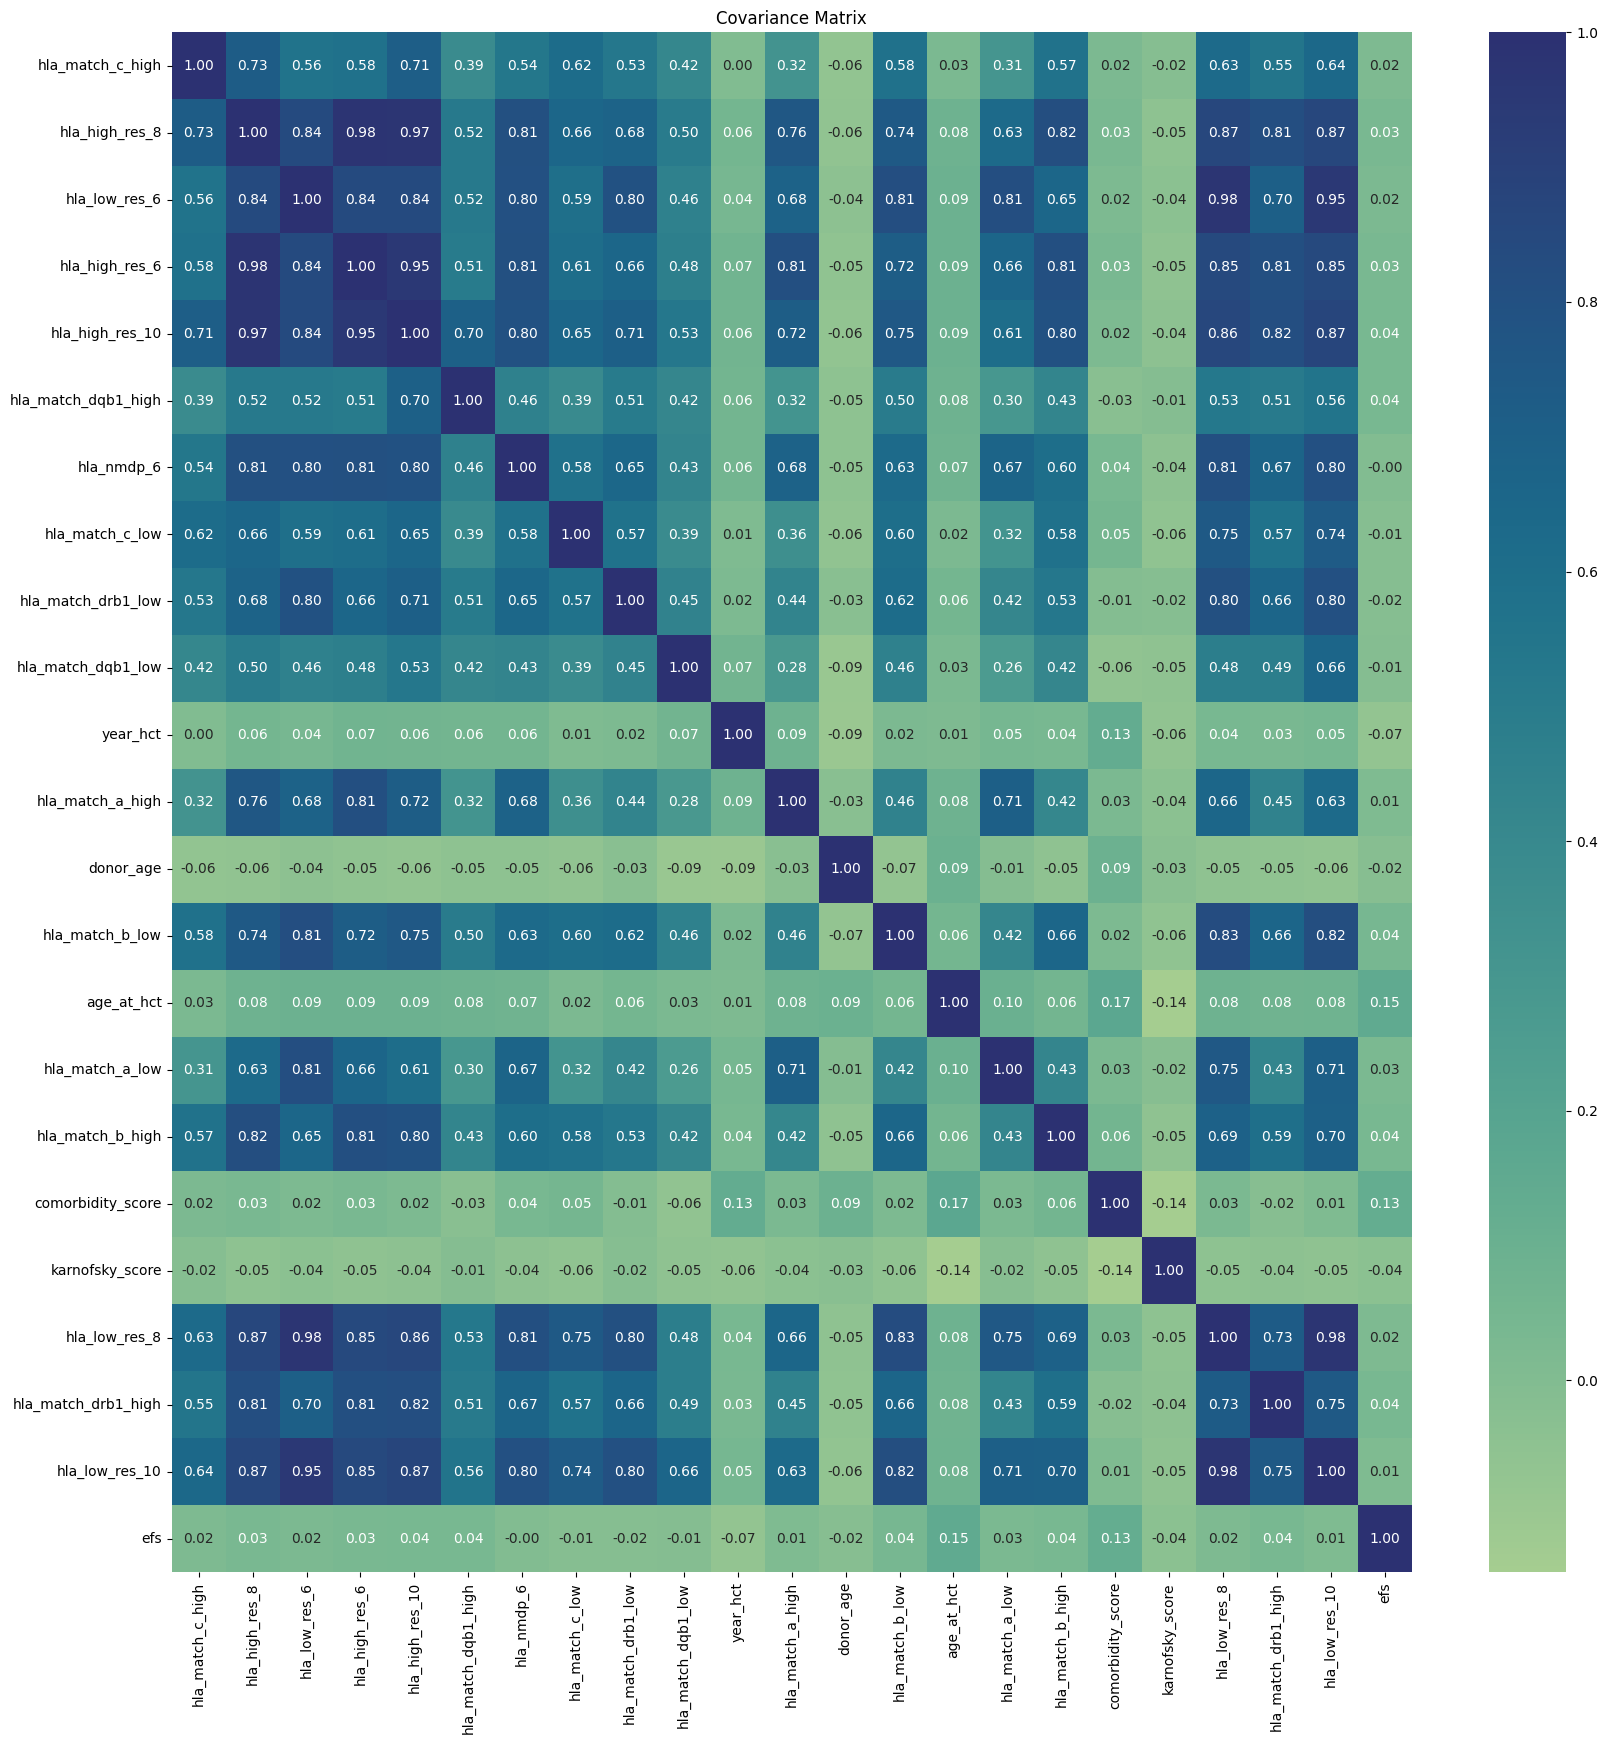

In [14]:
# covariance matrix plot after NAN are removed

# Import file with data
cols_to_drop = ["efs_time","ID"]
y_train = df_train["efs"]
df_plot = df_train.drop(cols_to_drop,axis=1)

print("shape before NaN removal: ",df_plot.shape)
df_plot = df_plot.dropna(how = 'any')
print("shape after NaN removal: ",df_plot.shape)
# Calculate the covariance matrix
data = df_plot.corr(numeric_only=True)
print(data.shape)
# Plot the covariance matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data, annot=True, fmt=".2f", cbar=True,cmap="crest")
plt.title('Covariance Matrix')
plt.show()

In [15]:
cols_to_drop = ["efs_time","efs"]
y_train = df_train["efs"]
df_train = df_train.drop(cols_to_drop,axis=1)

In [16]:
df_train.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0


In [17]:
df_test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


In [18]:
print("Shape of the training data: ",df_train.shape)
print("Shape of the test data: ",df_test.shape)

Shape of the training data:  (28800, 58)
Shape of the test data:  (3, 58)


In [19]:
test_data_start_index = df_train.shape[0]
df = pd.concat([df_train,df_test],axis=0,ignore_index =True)
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28798,28798,N/A - non-malignant indication,No,Poor,No,1.0,4.0,No TBI,No,3.0,...,90.0,No,Permissive mismatched,Related,MEL,4.0,No,1.0,No,5.0
28799,28799,N/A - pediatric,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,Yes,10.0
28800,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
28801,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0


In [20]:
df.columns

Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_hi

In [21]:
df = df.drop("ID",axis=1)
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28798,N/A - non-malignant indication,No,Poor,No,1.0,4.0,No TBI,No,3.0,Peripheral blood,...,90.0,No,Permissive mismatched,Related,MEL,4.0,No,1.0,No,5.0
28799,N/A - pediatric,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,Yes,10.0
28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0


In [22]:
column = 'tce_match'
print(" %age of non-NAN values: ",df[column].value_counts().sum()/df[column].shape[0])
df[column].value_counts()

 %age of non-NAN values:  0.3404159288962955


tce_match
Permissive            6273
GvH non-permissive    1605
Fully matched         1059
HvG non-permissive     868
Name: count, dtype: int64

In [23]:
column = 'tce_div_match'
print(" %age of non-NAN values: ",df[column].value_counts().sum()/df[column].shape[0])
df[column].value_counts()

 %age of non-NAN values:  0.6043120508280387


tce_div_match
Permissive mismatched            12938
GvH non-permissive                2458
HvG non-permissive                1417
Bi-directional non-permissive      593
Name: count, dtype: int64

In [24]:
# Numerical and categorical features

#categorical_columns = df.select_dtypes(include=['object', 'category']).columns
#numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

numerical_columns=["hla_high_res_8","hla_match_dqb1_high",
          "hla_match_drb1_low","year_hct","donor_age","age_at_hct",
          "hla_match_a_low","comorbidity_score","karnofsky_score"
         ]

categorical_columns = ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status',
       'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe',
       'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab',
       'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
       'obesity', 'mrd_hct', 'in_vivo_tcd', 'hepatic_severe',
       'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match',
       'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'cardiac', 'pulm_moderate']
print("Number of categorical_columns: ",len(categorical_columns))
print("Number of numerical_columns: ",len(numerical_columns))

Number of categorical_columns:  34
Number of numerical_columns:  9


In [25]:
print("categorical_columns: ",categorical_columns)
print("numerical_columns: ",numerical_columns)

categorical_columns:  ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']
numerical_columns:  ['hla_high_res_8', 'hla_match_dqb1_high', 'hla_match_drb1_low', 'year_hct', 'donor_age', 'age_at_hct', 'hla_match_a_low', 'comorbidity_score', 'karnofsky_score']


## Taking selected columns in numerical data having highest correlation with output variable

In [26]:
data_num = df[numerical_columns]
data_cat = df[categorical_columns].fillna("Unknown")

In [27]:
data_num.describe()

,hla_high_res_8,hla_match_dqb1_high,hla_match_drb1_low,year_hct,donor_age,age_at_hct,hla_match_a_low,comorbidity_score,karnofsky_score
count,22973.000000,23604.000000,26160.000000,28803.000000,26993.000000,28803.000000,26413.000000,28326.000000,27933.000000
mean,6.876899,1.736909,1.715329,2015.179356,42.512694,38.662178,1.709121,1.702252,83.832743
std,1.564280,0.447668,0.451266,3.154117,15.252228,21.147195,0.458243,1.994403,11.028433
min,2.000000,0.000000,1.000000,2008.000000,18.010000,0.044000,0.000000,0.000000,40.000000
25%,6.000000,1.000000,1.000000,2013.000000,28.447000,19.539000,1.000000,0.000000,70.000000
50%,8.000000,2.000000,2.000000,2016.000000,40.064000,41.005000,2.000000,1.000000,90.000000
75%,8.000000,2.000000,2.000000,2018.000000,56.136000,55.964500,2.000000,2.000000,90.000000
max,8.000000,2.000000,2.000000,2020.000000,84.800000,73.726000,2.000000,10.000000,100.000000


In [28]:
# i= np.random.randint(len(numerical_columns))
# series = data_num[numerical_columns[i]].value_counts()
# series.plot(kind='bar', title=numerical_columns[i])

In [29]:
data_num.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,hla_high_res_8,hla_match_dqb1_high,hla_match_drb1_low,year_hct,donor_age,age_at_hct,hla_match_a_low,comorbidity_score,karnofsky_score
0,NaN,2.0,2.0,2016,NaN,9.942,2.0,0.0,90.0
1,8.0,2.0,2.0,2008,72.29,43.705,2.0,3.0,90.0
2,8.0,2.0,2.0,2019,NaN,33.997,2.0,0.0,90.0
3,8.0,2.0,2.0,2009,29.23,43.245,2.0,0.0,90.0
4,8.0,2.0,2.0,2018,56.81,29.740,2.0,1.0,90.0


In [30]:
norm_data_num = (data_num - data_num.min())/(data_num.max()-data_num.min())
norm_data_num

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,hla_high_res_8,hla_match_dqb1_high,hla_match_drb1_low,year_hct,donor_age,age_at_hct,hla_match_a_low,comorbidity_score,karnofsky_score
0,NaN,1.0,1.0,0.666667,NaN,0.134334,1.0,0.0,0.833333
1,1.000000,1.0,1.0,0.000000,0.812697,0.592560,1.0,0.3,0.833333
2,1.000000,1.0,1.0,0.916667,NaN,0.460805,1.0,0.0,0.833333
3,1.000000,1.0,1.0,0.083333,0.167989,0.586317,1.0,0.0,0.833333
4,1.000000,1.0,1.0,0.833333,0.580925,0.403029,1.0,0.1,0.833333
...,...,...,...,...,...,...,...,...,...
28798,0.333333,0.5,0.0,0.833333,0.599850,0.000000,0.5,0.1,0.833333
28799,1.000000,1.0,1.0,0.833333,0.188067,0.013450,1.0,0.2,0.833333
28800,NaN,1.0,1.0,0.666667,NaN,0.134334,1.0,0.0,0.833333
28801,1.000000,1.0,1.0,0.000000,0.812697,0.592560,1.0,0.3,0.833333


<Axes: title={'center': 'dri_score'}, xlabel='dri_score'>

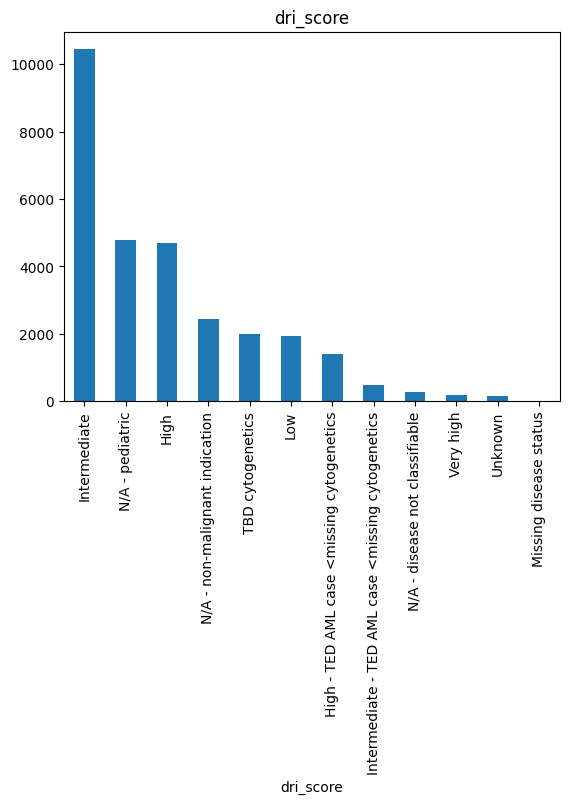

In [31]:
i = np.random.randint(len(categorical_columns))
series = data_cat[categorical_columns[i]].value_counts()
series.plot(kind='bar', title=categorical_columns[i])

In [32]:
from sklearn.preprocessing import OneHotEncoder
data_cat_encoded = pd.get_dummies(data_cat, columns=categorical_columns, drop_first=True)
#print(f"One-Hot Encoded Data using Pandas:\n{data_cat_encoded}\n")

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(data_cat[categorical_columns])

data_cat_encoded = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
data_cat_encoded

,dri_score_High,dri_score_High - TED AML case <missing cytogenetics,dri_score_Intermediate,dri_score_Intermediate - TED AML case <missing cytogenetics,dri_score_Low,dri_score_Missing disease status,dri_score_N/A - disease not classifiable,dri_score_N/A - non-malignant indication,dri_score_N/A - pediatric,dri_score_TBD cytogenetics,...,"melphalan_dose_N/A, Mel not given",melphalan_dose_Unknown,cardiac_No,cardiac_Not done,cardiac_Unknown,cardiac_Yes,pulm_moderate_No,pulm_moderate_Not done,pulm_moderate_Unknown,pulm_moderate_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28801,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
print("Shape of norm_data_num: ",norm_data_num.shape )
print("Shape of data_cat_encoded: ",data_cat_encoded.shape)
final_data = pd.concat([norm_data_num,data_cat_encoded],axis=1)
print("Shape of final normalized and categorical encoded data: ",final_data.shape)
final_data.head()

Shape of norm_data_num:  (28803, 9)
Shape of data_cat_encoded:  (28803, 186)
Shape of final normalized and categorical encoded data:  (28803, 195)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,hla_high_res_8,hla_match_dqb1_high,hla_match_drb1_low,year_hct,donor_age,age_at_hct,hla_match_a_low,comorbidity_score,karnofsky_score,dri_score_High,...,"melphalan_dose_N/A, Mel not given",melphalan_dose_Unknown,cardiac_No,cardiac_Not done,cardiac_Unknown,cardiac_Yes,pulm_moderate_No,pulm_moderate_Not done,pulm_moderate_Unknown,pulm_moderate_Yes
0,NaN,1.0,1.0,0.666667,NaN,0.134334,1.0,0.0,0.833333,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.000000,0.812697,0.592560,1.0,0.3,0.833333,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,0.916667,NaN,0.460805,1.0,0.0,0.833333,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.083333,0.167989,0.586317,1.0,0.0,0.833333,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.833333,0.580925,0.403029,1.0,0.1,0.833333,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
final_data.describe()

,hla_high_res_8,hla_match_dqb1_high,hla_match_drb1_low,year_hct,donor_age,age_at_hct,hla_match_a_low,comorbidity_score,karnofsky_score,dri_score_High,...,"melphalan_dose_N/A, Mel not given",melphalan_dose_Unknown,cardiac_No,cardiac_Not done,cardiac_Unknown,cardiac_Yes,pulm_moderate_No,pulm_moderate_Not done,pulm_moderate_Unknown,pulm_moderate_Yes
count,22973.000000,23604.000000,26160.000000,28803.000000,26993.000000,28803.000000,26413.000000,28326.000000,27933.000000,28803.000000,...,28803.000000,28803.000000,28803.000000,28803.000000,28803.000000,28803.000000,28803.000000,28803.000000,28803.000000,28803.000000
mean,0.812816,0.868454,0.715329,0.598280,0.366862,0.524120,0.854560,0.170225,0.730546,0.163212,...,0.699163,0.048780,0.853904,0.005104,0.088255,0.052738,0.740895,0.005763,0.071069,0.182273
std,0.260713,0.223834,0.451266,0.262843,0.228361,0.287006,0.229122,0.199440,0.183807,0.369566,...,0.458630,0.215411,0.353208,0.071258,0.283670,0.223513,0.438151,0.075699,0.256945,0.386076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.500000,0.000000,0.416667,0.156266,0.264583,0.500000,0.000000,0.500000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.666667,0.330199,0.555916,1.000000,0.100000,0.833333,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.833333,0.570834,0.758944,1.000000,0.200000,0.833333,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
count_nan = final_data.isnull().sum().sum()
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 19219


In [36]:
final_data.fillna(final_data.mean(), inplace=True)


In [37]:
count_nan = final_data.isnull().sum().sum()
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 0


In [38]:
final_data.iloc[0,:]

hla_high_res_8            0.812816
hla_match_dqb1_high       1.000000
hla_match_drb1_low        1.000000
year_hct                  0.666667
donor_age                 0.366862
                            ...   
cardiac_Yes               0.000000
pulm_moderate_No          1.000000
pulm_moderate_Not done    0.000000
pulm_moderate_Unknown     0.000000
pulm_moderate_Yes         0.000000
Name: 0, Length: 195, dtype: float64

In [39]:
print("shape before padding :",final_data.shape)
for i in range(1,2):
    final_data["pad"+str(i)]=0
print("shape after padding:",final_data.shape)
final_data.iloc[0,:]

shape before padding : (28803, 195)
shape after padding: (28803, 196)


hla_high_res_8            0.812816
hla_match_dqb1_high       1.000000
hla_match_drb1_low        1.000000
year_hct                  0.666667
donor_age                 0.366862
                            ...   
pulm_moderate_No          1.000000
pulm_moderate_Not done    0.000000
pulm_moderate_Unknown     0.000000
pulm_moderate_Yes         0.000000
pad1                      0.000000
Name: 0, Length: 196, dtype: float64

In [40]:
data_np = final_data.to_numpy()
data_np = np.reshape(data_np,(final_data.shape[0],14,14))
data_np.shape

(28803, 14, 14)

In [41]:

X_train =  data_np[:len(df_train)]
X_test = data_np[len(df_train):]
X_train.shape, X_test.shape, y_train.shape

((28800, 14, 14), (3, 14, 14), (28800,))

931


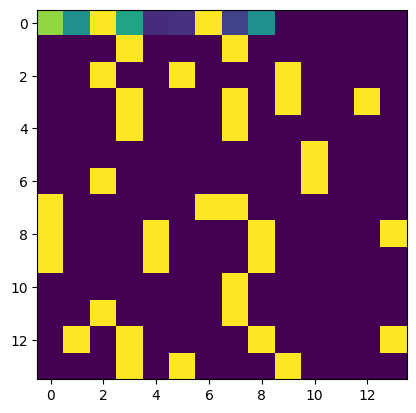

In [42]:
i = np.random.randint(0,X_train.shape[0])
print(i)
plt.imshow(X_train[i])

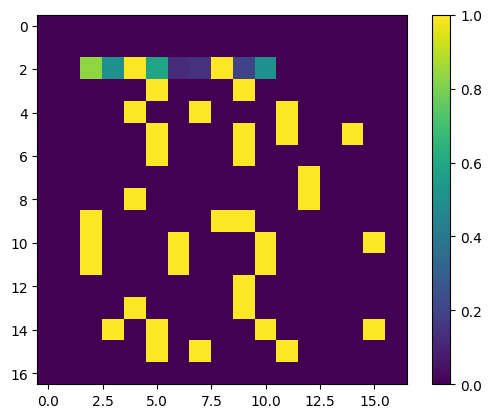

In [43]:
paddings = tf.constant([[2, 1,], [2, 1]])
plt.imshow(tf.pad(X_train[i],paddings,"CONSTANT"))
plt.colorbar()

In [44]:
# # creating model with diffeent layers involving con layers , dropout,flatten layers.

# import tensorflow as tf

# model = tf.keras.models.Sequential([
#     tf.keras.layers.InputLayer(shape=(14,14)),
#     tf.keras.layers.ZeroPadding1D(padding=2),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(128, 3, activation="relu",padding='same'),
#     tf.keras.layers.AveragePooling1D(pool_size=2,strides=1, padding="same"),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     tf.keras.layers.MaxPool1D(pool_size=2,strides=2,padding='valid'),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     #tf.keras.layers.AveragePooling1D(pool_size=3,strides=1, padding="valid"),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation="relu"),
#     tf.keras.layers.Dense(64, activation="relu"),
#     tf.keras.layers.Dense(64, activation="relu"),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32, activation="relu"),
#     tf.keras.layers.Dense(32, activation="relu"),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005 ),
#               metrics=["accuracy"])

# # history1 = model.fit(X_train, y_train, epochs=300, batch_size=256,validation_split=0.15)



In [45]:
# from tensorflow.keras.callbacks import ModelCheckpoint


# import tensorflow as tf

# model = tf.keras.models.Sequential([
#     tf.keras.layers.InputLayer(shape=(14,14)),  
#     tf.keras.layers.ZeroPadding1D(padding=2),
# # tf.keras.layers.Conv1D(8, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
#     tf.keras.layers.Conv1D(32, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
#     tf.keras.layers.Conv1D(64, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
#     tf.keras.layers.Conv1D(64, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
#     tf.keras.layers.Conv1D(128, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    
#     tf.keras.layers.AveragePooling1D(pool_size=2, strides=1, padding="same"),
    
#     tf.keras.layers.Conv1D(64, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Conv1D(64, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
#     tf.keras.layers.Conv1D(32, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    
#     tf.keras.layers.MaxPool1D(pool_size=2, strides=2, padding='valid'),
    
#     tf.keras.layers.Conv1D(32, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
#     tf.keras.layers.Conv1D(32, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    
#     tf.keras.layers.Flatten(),
    
#     tf.keras.layers.Dense(128, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
#     tf.keras.layers.Dense(64, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(64, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
#     tf.keras.layers.Dense(32, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
#     # tf.keras.layers.Dense(16, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])
# model.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005 ),
#               metrics=["accuracy"])
# # Define checkpoint to save the best model
# checkpoint_callback = ModelCheckpoint("/kaggle/working/best_model.keras", 
#                                       monitor="val_accuracy",  # Monitor validation accuracy
#                                       save_best_only=True,     # Save only the best model
#                                       mode="max",              # Maximize validation accuracy
#                                       verbose=1
#                                      )

# history1 = model.fit(X_train, y_train, 
#                      epochs=300, 
#                      batch_size=256, 
#                      validation_split=0.15, 
#                      callbacks=[checkpoint_callback])

In [46]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

model = tf.keras.models.Sequential([
    # Input Layer with Gaussian Noise
    tf.keras.layers.InputLayer(shape=(14,14)),  
    tf.keras.layers.GaussianNoise(0.1),  # Adds slight noise to inputs to improve generalization
    
    tf.keras.layers.ZeroPadding1D(padding=2),

    # Convolutional Layers with He Initialization
    # tf.keras.layers.Conv1D(8, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Conv1D(32, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    
    tf.keras.layers.Conv1D(64, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.GaussianNoise(0.05),  # Adds noise to feature maps
    
    tf.keras.layers.Conv1D(64, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Conv1D(128, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    
    tf.keras.layers.AveragePooling1D(pool_size=2, strides=1, padding="same"),
    
    tf.keras.layers.Conv1D(64, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Dropout(0.4),  # Prevents overfitting
    
    tf.keras.layers.Conv1D(64, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Conv1D(32, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    
    tf.keras.layers.MaxPool1D(pool_size=2, strides=2, padding='valid'),
    
    tf.keras.layers.Conv1D(32, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Conv1D(32, 3, activation="relu", padding='same', kernel_initializer=tf.keras.initializers.HeNormal()),
    
    tf.keras.layers.Flatten(),
    
    # Fully Connected Layers with L2 Regularization
    tf.keras.layers.Dense(128, activation="relu", 
                          kernel_initializer=tf.keras.initializers.HeNormal(),
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization

    tf.keras.layers.Dense(64, activation="relu", 
                          kernel_initializer=tf.keras.initializers.HeNormal(),
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Dense(64, activation="relu", 
                          kernel_initializer=tf.keras.initializers.HeNormal(),
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Dropout(0.2),  # Extra dropout for regularization
    
    tf.keras.layers.Dense(32, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Dense(32, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
    
    tf.keras.layers.Dense(16, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
    
    tf.keras.layers.Dense(1, activation="sigmoid")  # Output Layer
])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              metrics=["accuracy"])

# Define checkpoint to save the best model
checkpoint_callback = ModelCheckpoint("/kaggle/working/best_model.keras", 
                                      monitor="val_accuracy",  
                                      save_best_only=True,     
                                      mode="max",              
                                      verbose=1
                                     )

# Train the model
history1 = model.fit(X_train, y_train, 
                     epochs=300, 
                     batch_size=512, 
                     validation_split=0.10, 
                     callbacks=[checkpoint_callback])


Epoch 1/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4973 - loss: 5.7490
Epoch 1: val_accuracy improved from -inf to 0.57431, saving model to /kaggle/working/best_model.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.4975 - loss: 5.7480 - val_accuracy: 0.5743 - val_loss: 5.5933
Epoch 2/300
50/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5328 - loss: 5.5600
Epoch 2: val_accuracy improved from 0.57431 to 0.57986, saving model to /kaggle/working/best_model.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5329 - loss: 5.5583 - val_accuracy: 0.5799 - val_loss: 5.4211
Epoch 3/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5501 - loss: 5.3845
Epoch 3: val_accuracy improved from 0.57986 to 0.61007, saving model to /kaggle/working/best_model.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5503 - loss: 5.3837 - val_accuracy: 0.6101 - val_loss: 5.2497
Epoch 4/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5738 - loss: 5.212

In [47]:
# Get the maximum validation accuracy from the training history
max_val_acc = max(history1.history["val_accuracy"])

# Print the maximum validation accuracy
print(f"Max Validation Accuracy: {max_val_acc:.4f}")


Max Validation Accuracy: 0.6778


In [48]:
# model2 = tf.keras.models.Sequential([
#     tf.keras.layers.InputLayer(shape=(15,15)),
#     tf.keras.layers.ZeroPadding1D(padding=2),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(128, 3, activation="relu",padding='same'),
#     tf.keras.layers.AveragePooling1D(pool_size=2,strides=1, padding="same"),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     tf.keras.layers.MaxPool1D(pool_size=2,strides=2,padding='valid'),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     #tf.keras.layers.AveragePooling1D(pool_size=3,strides=1, padding="valid"),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation="relu"),
#     tf.keras.layers.Dense(64, activation="relu"),
#     tf.keras.layers.Dense(64, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32, activation="relu"),
#     tf.keras.layers.Dense(32, activation="relu"),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model2.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.AdamW(learning_rate=0.000001 ),
#               metrics=["accuracy"])

# history_AdamW = model2.fit(X_train, y_train, epochs=300, batch_size=256,validation_split=0.15)

In [49]:
# model3 = tf.keras.models.Sequential([
#     tf.keras.layers.InputLayer(shape=(15,15)),
#     tf.keras.layers.ZeroPadding1D(padding=2),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(128, 3, activation="relu",padding='same'),
#     tf.keras.layers.AveragePooling1D(pool_size=2,strides=1, padding="same"),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv1D(64, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     tf.keras.layers.MaxPool1D(pool_size=2,strides=2,padding='valid'),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     tf.keras.layers.Conv1D(32, 3, activation="relu",padding='same'),
#     #tf.keras.layers.AveragePooling1D(pool_size=3,strides=1, padding="valid"),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation="relu"),
#     tf.keras.layers.Dense(64, activation="relu"),
#     tf.keras.layers.Dense(64, activation="relu"),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32, activation="relu"),
#     tf.keras.layers.Dense(32, activation="relu"),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model3.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adamax(learning_rate=0.000001 ),
#               metrics=["accuracy"])

# history_Adamax = model3.fit(X_train, y_train, epochs=300, batch_size=256,validation_split=0.15)

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)       │ (None, 14, 14)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding1d (ZeroPadding1D)       │ (None, 18, 14)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 18, 32)              │           1,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 18, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_1 (GaussianNoise)     │ (None, 18, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 18, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 18, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d (AveragePooling1D) │ (None, 18, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 18, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 18, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 18, 32)              │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 9, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 9, 32)               │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 9, 32)               │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 441,317 (1.68 MB)

 Trainable params: 147,105 (574.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 294,212 (1.12 MB)

In [51]:
# # plot loss and accuracy vs epochs
# epochs1 = range(1,len(history1.history["loss"])+1)
# plt.figure(figsize=(14,10))
# plt.subplot(2,2,1)
# plt.plot(epochs1,history1.history['loss'], label="model1 loss")
# plt.plot(epochs1,history_AdamW.history['loss'], label="model_AdamW loss")
# plt.plot(epochs1,history_Adamax.history['loss'], label="model_Adamax loss")
# plt.legend()

# plt.subplot(2,2,2)
# plt.plot(epochs1,history1.history['accuracy'], label="model1 accuracy")
# plt.plot(epochs1,history_AdamW.history['accuracy'], label="model_AdamW accuracy")
# plt.plot(epochs1,history_Adamax.history['accuracy'], label="model_Adamax accuracy")
# plt.legend()

# plt.subplot(2,2,3)
# plt.plot(epochs1,history1.history['val_loss'], label="model1 val_loss")
# plt.plot(epochs1,history_AdamW.history['val_loss'], label="model_AdamW val_loss")
# plt.plot(epochs1,history_Adamax.history['val_loss'], label="model_Adamax val_loss")
# plt.legend()

# plt.subplot(2,2,4)
# plt.plot(epochs1,history1.history['val_accuracy'], label="model1 val_accuracy")
# plt.plot(epochs1,history_AdamW.history['val_accuracy'], label="model_AdamW val_accuracy")
# plt.plot(epochs1,history_Adamax.history['val_accuracy'], label="model_AdamW val_accuracy")
# plt.legend()


In [52]:
# # Build the model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(128, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=35, batch_size=32)


In [53]:
# prediction = model.predict(X_test)
# Load the best saved model
best_model = tf.keras.models.load_model("/kaggle/working/best_model.keras")

# Make predictions
prediction = best_model.predict(X_test)

prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step


array([[0.19022834],
       [0.5795425 ],
       [0.12757108]], dtype=float32)

In [54]:
ID = [i for i in range(len(X_train),len(X_train)+len(X_test),1)]
prediction = [prediction[i][0] for i in range(0,len(X_test),1)]

In [55]:
prediction

[0.19022834, 0.5795425, 0.12757108]

In [56]:
output_data = { "ID":ID ,"prediction":prediction}
output_data

{'ID': [28800, 28801, 28802],
 'prediction': [0.19022834, 0.5795425, 0.12757108]}

In [57]:
output_df = pd.DataFrame(output_data)

In [58]:
output_df.to_csv('/kaggle/working/submission.csv', index=False)